INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 32.22% out of 9.80G


<IPython.core.display.Javascript object>


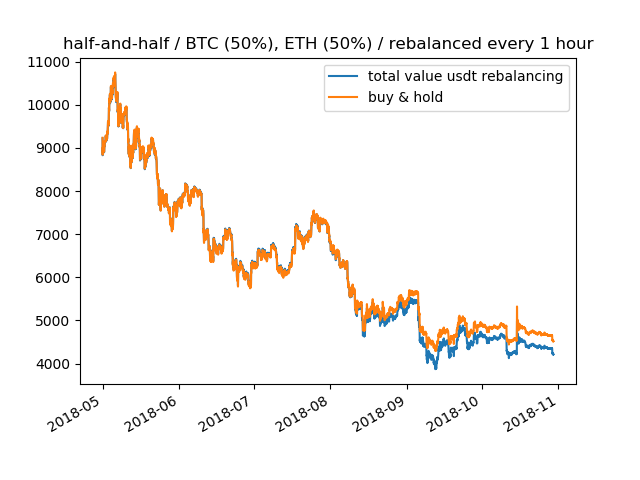

<IPython.core.display.Javascript object>


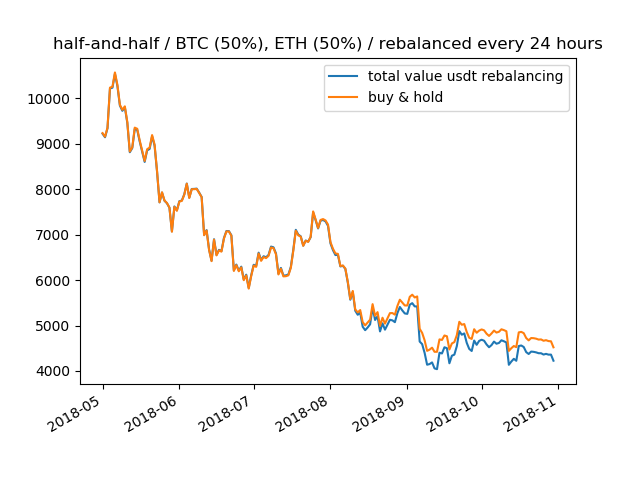

<IPython.core.display.Javascript object>


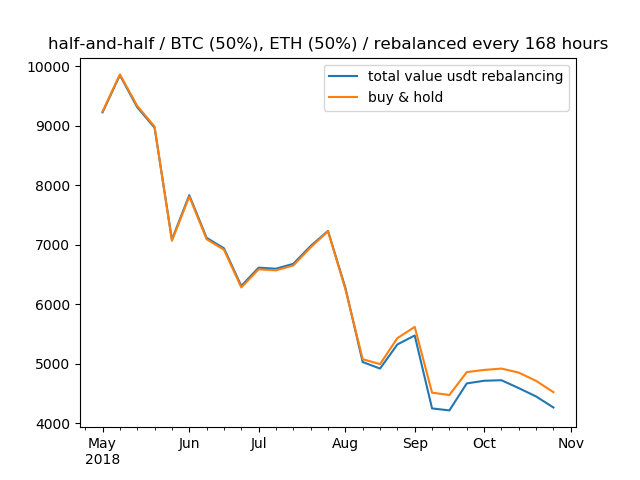

<IPython.core.display.Javascript object>


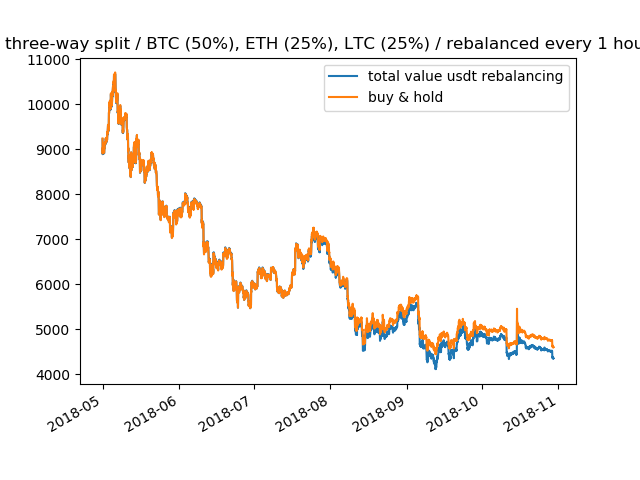

<IPython.core.display.Javascript object>


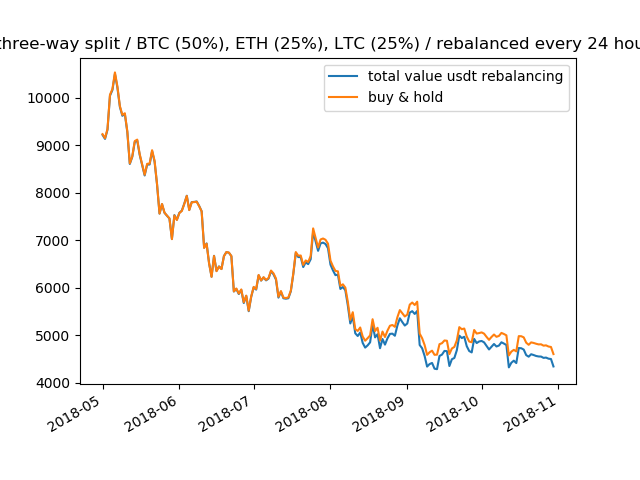

<IPython.core.display.Javascript object>


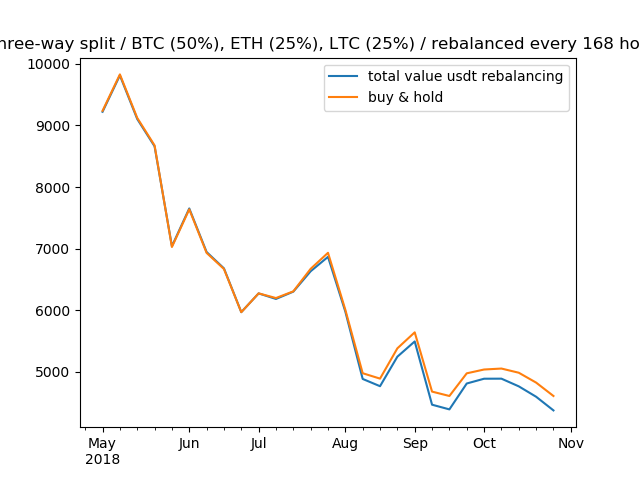

<IPython.core.display.Javascript object>


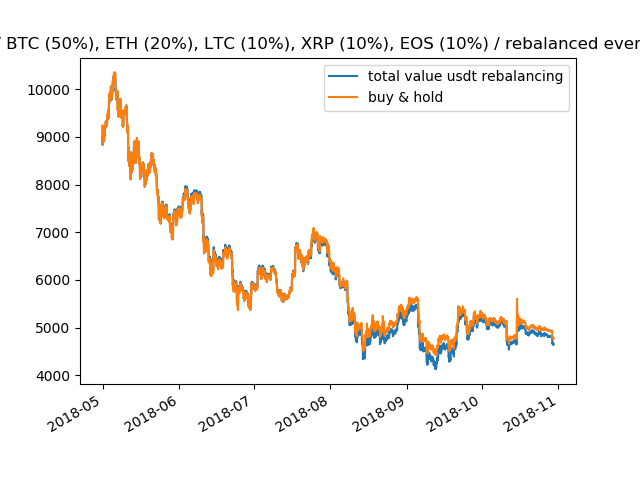

<IPython.core.display.Javascript object>


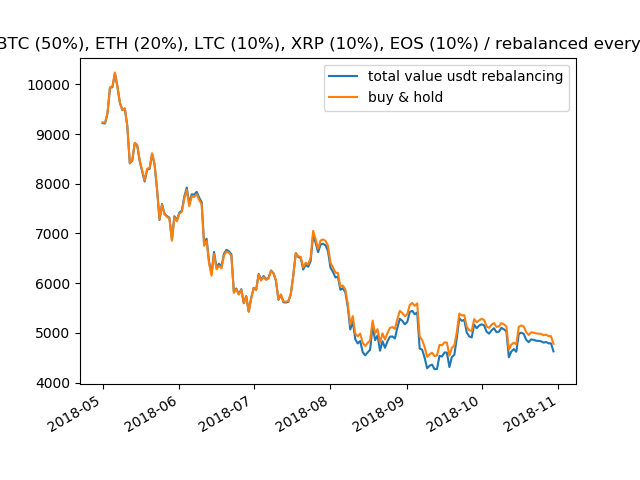

<IPython.core.display.Javascript object>


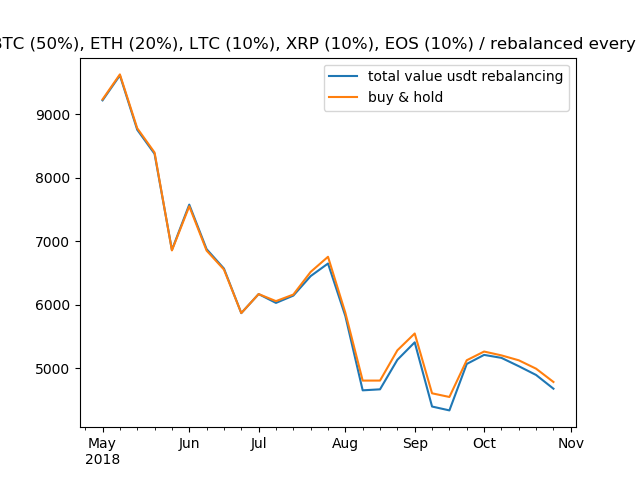

In [1]:
%matplotlib notebook

import psycopg2.extras
import pandas as pd
from apps.backtesting.rebalancing.backtester_portfolio import ComparativePortfolioEvaluation
import logging, sys
logging.disable(sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

portfolio_dicts = {
    'half-and-half': {
        'BTC': 0.5,
        'ETH': 0.5
    },
    'three-way split': {
        'BTC': 0.5,
        'ETH': 0.25,
        'LTC': 0.25,
    },
    'top-5': {
        'BTC': 0.5,
        'ETH': 0.2,
        'LTC': 0.1,
        'XRP': 0.1,
        'EOS': 0.1
    }
}

rebalancing_periods = [60*60, 60*60*24, 60*60*24*7]

def test_packs(start_time, end_time):
    c = ComparativePortfolioEvaluation(portfolio_dicts, start_time, end_time, rebalancing_periods, 
                                   start_value_of_portfolio=1, counter_currency='BTC', trading_cost_percent=0.25)
    return c

def save_info(comparative_evaluation, out_file):
    df_subset = c.comparative_df[['portfolio','allocations','rebalancing_period_hours',
                                  'profit_percent', 'benchmark_profit_percent',
                                  'profit_percent_usdt','benchmark_profit_percent_usdt']]
    writer = pd.ExcelWriter(out_file)
    df_subset.to_excel(writer)
    writer.save()
    writer.close()
    return df_subset


initial_test = test_packs('2018/05/01 00:00:00 UTC', '2018/10/30 00:00:00 UTC')
initial_test.save_return_figs('initial_test_figures')


<IPython.core.display.Javascript object>


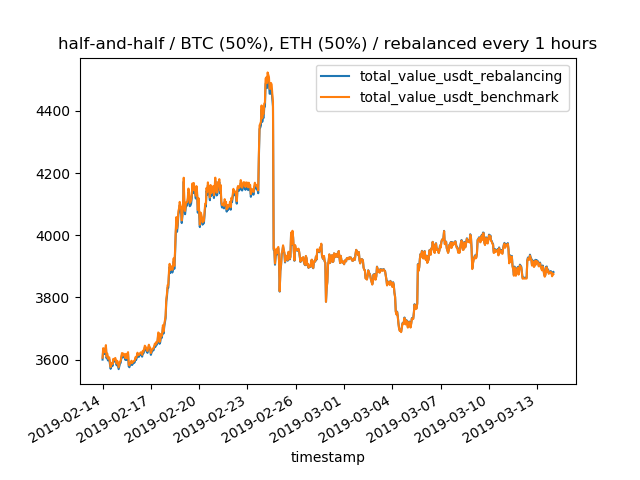

<IPython.core.display.Javascript object>


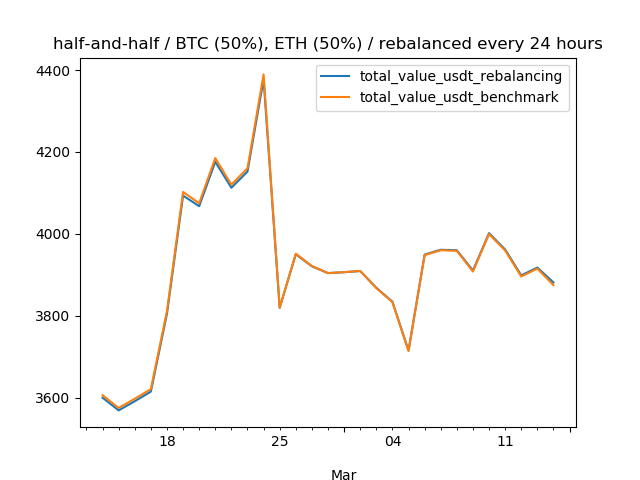

<IPython.core.display.Javascript object>


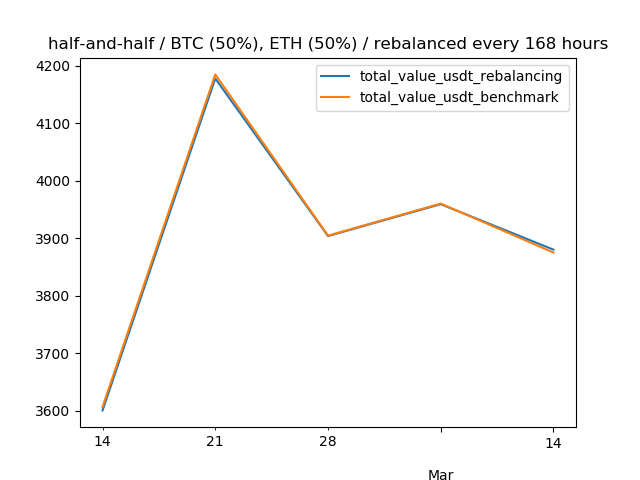

<IPython.core.display.Javascript object>


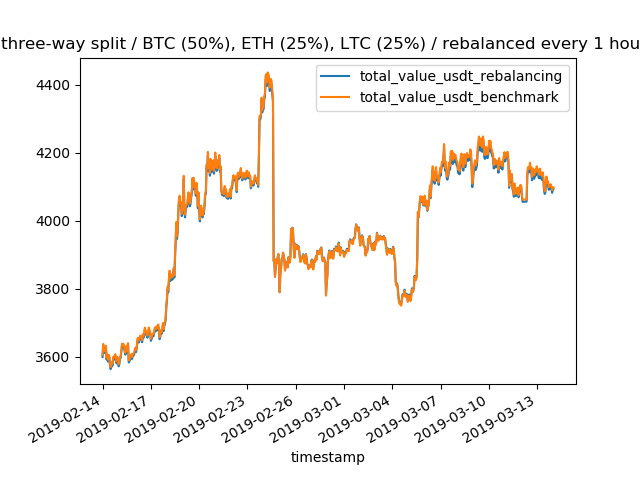

<IPython.core.display.Javascript object>


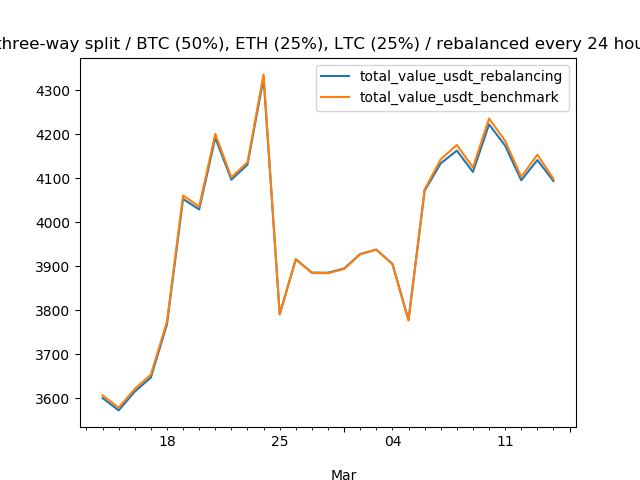

<IPython.core.display.Javascript object>


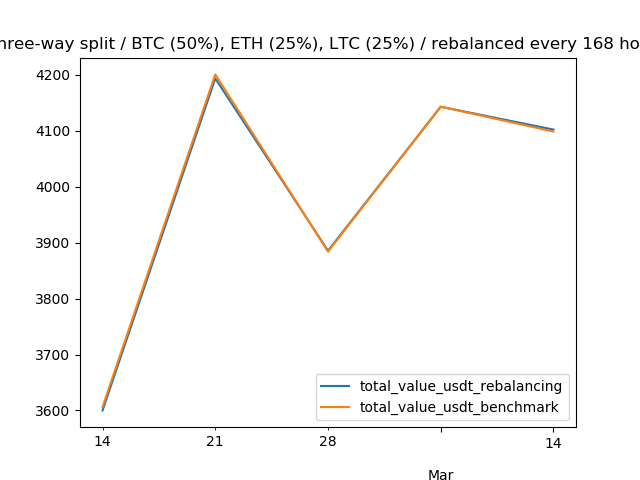

<IPython.core.display.Javascript object>


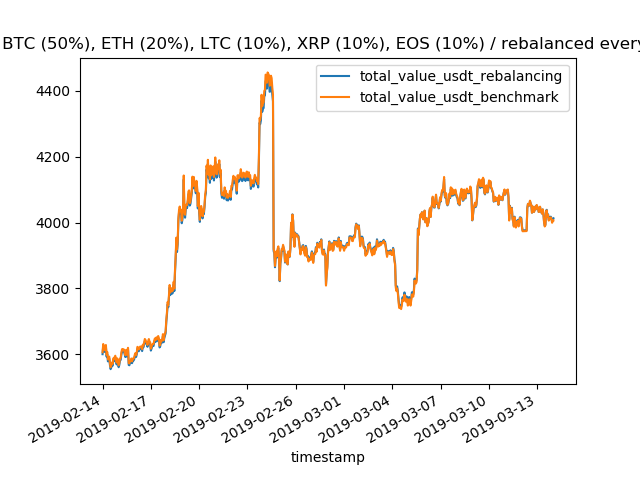

<IPython.core.display.Javascript object>


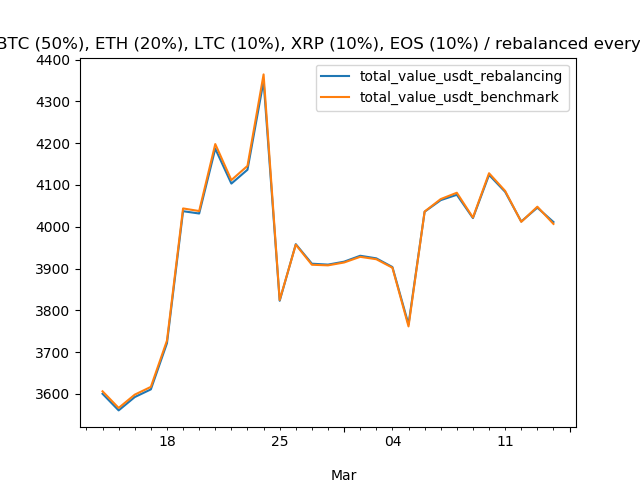

<IPython.core.display.Javascript object>


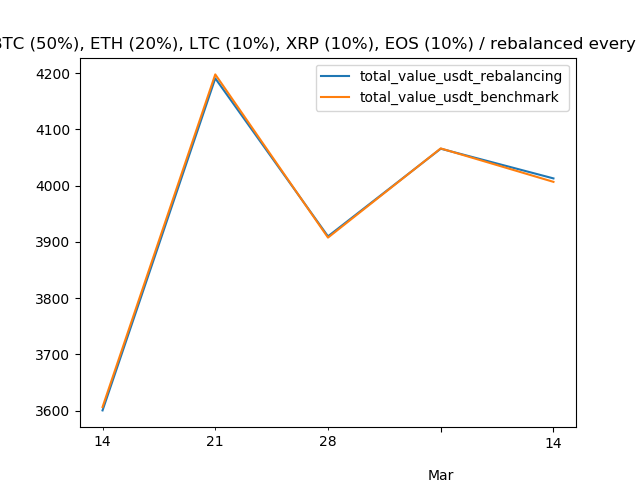

<IPython.core.display.Javascript object>


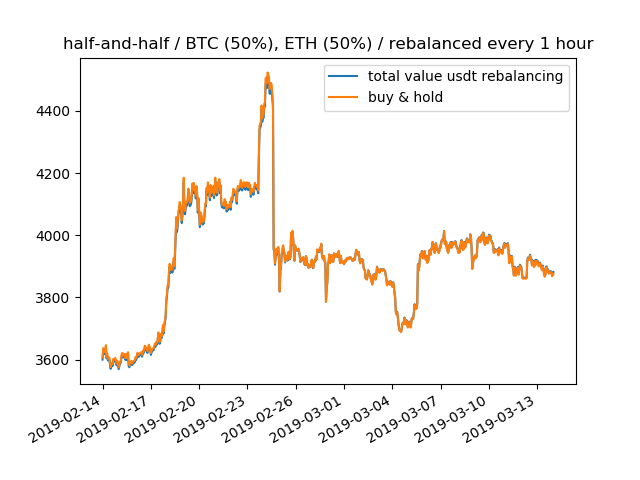

<IPython.core.display.Javascript object>


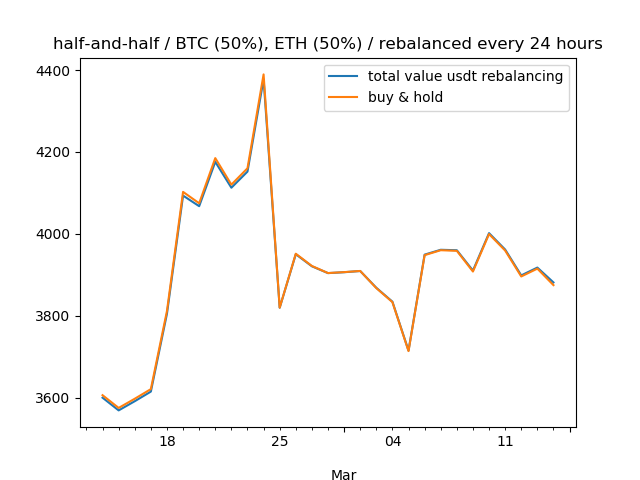

<IPython.core.display.Javascript object>


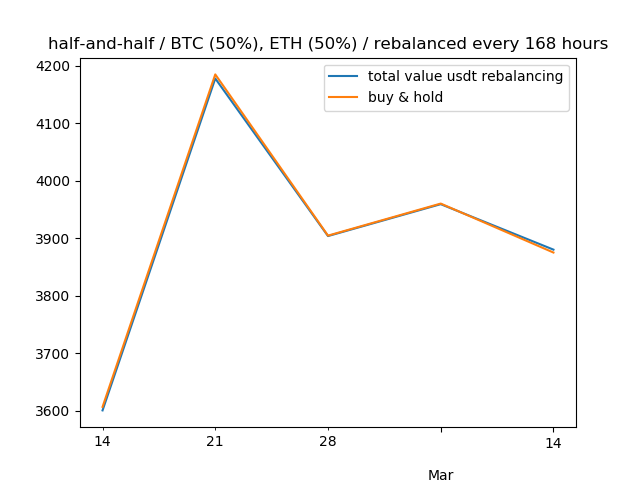

<IPython.core.display.Javascript object>


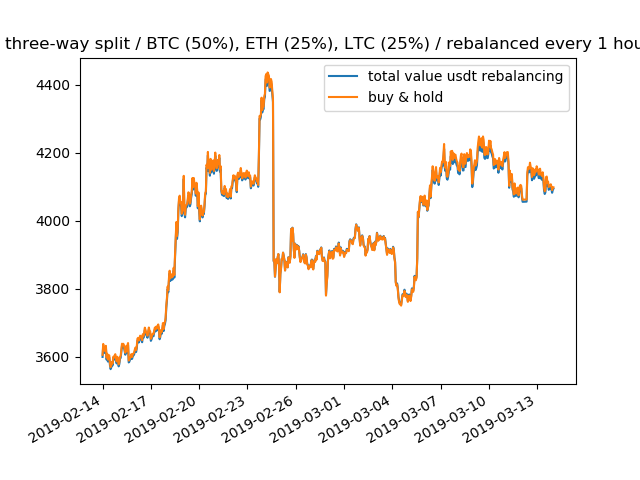

<IPython.core.display.Javascript object>


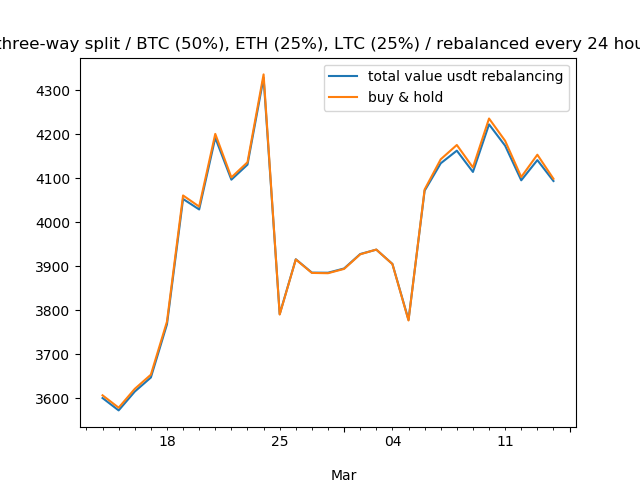

<IPython.core.display.Javascript object>


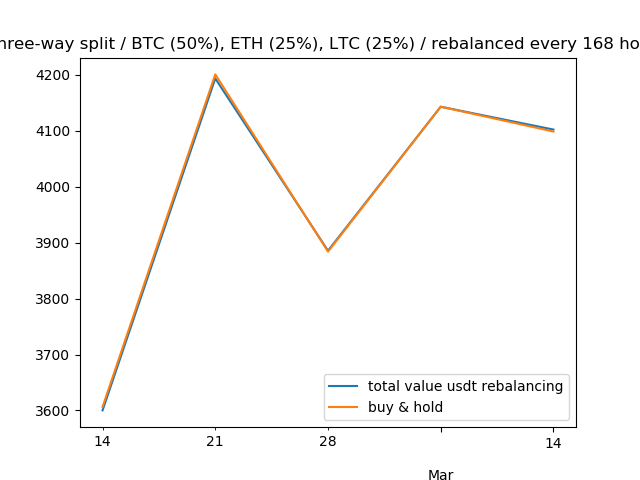

<IPython.core.display.Javascript object>


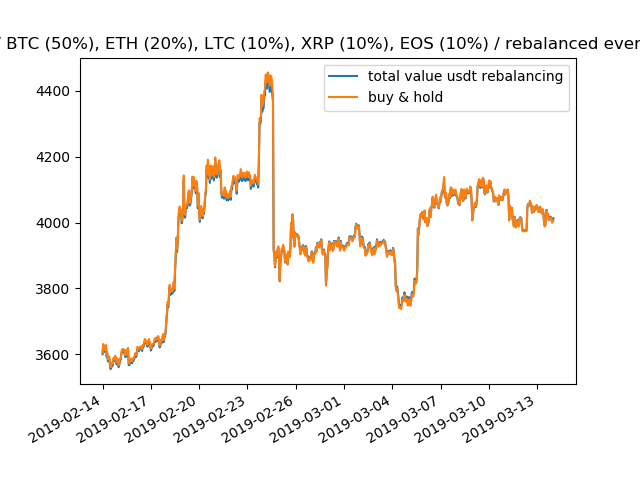

<IPython.core.display.Javascript object>


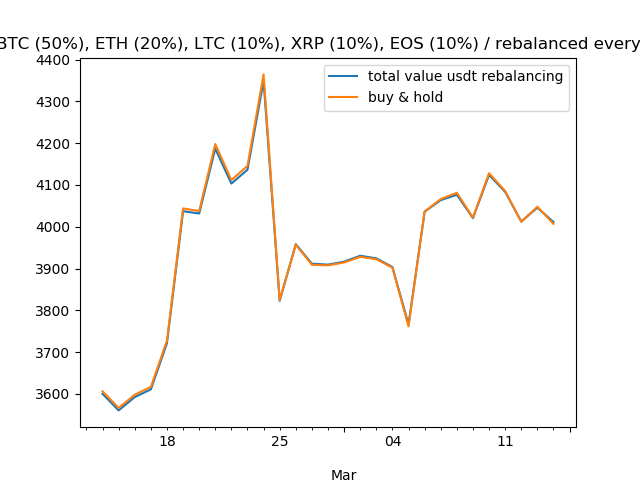

<IPython.core.display.Javascript object>


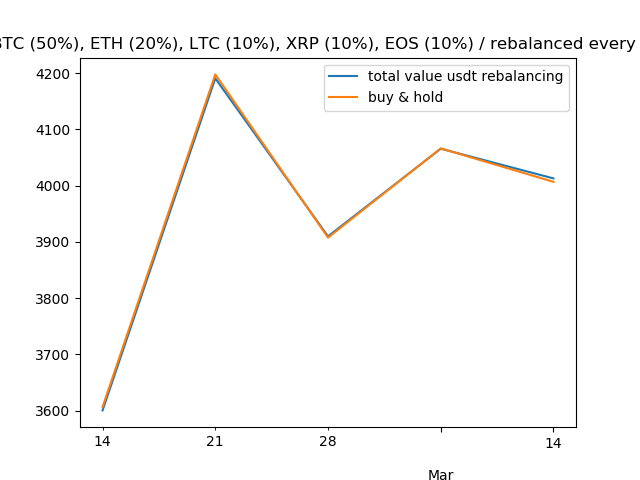

<IPython.core.display.Javascript object>


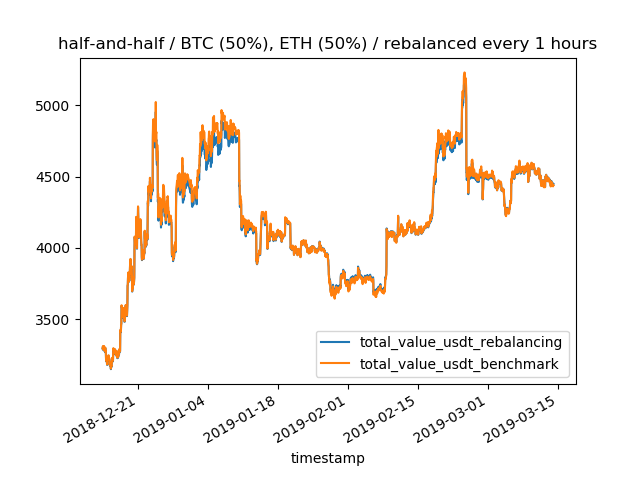

<IPython.core.display.Javascript object>


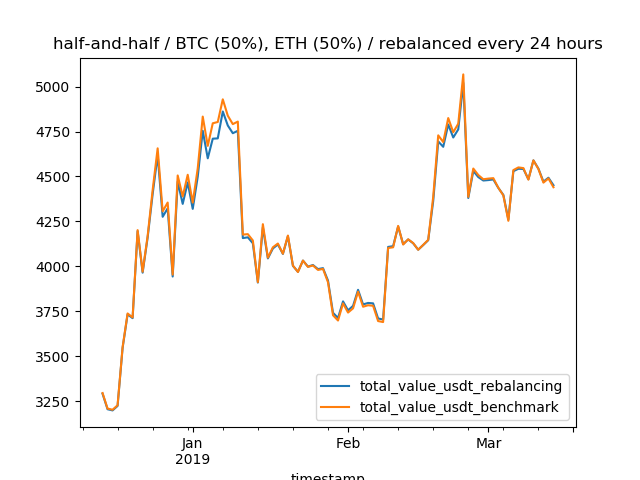

<IPython.core.display.Javascript object>


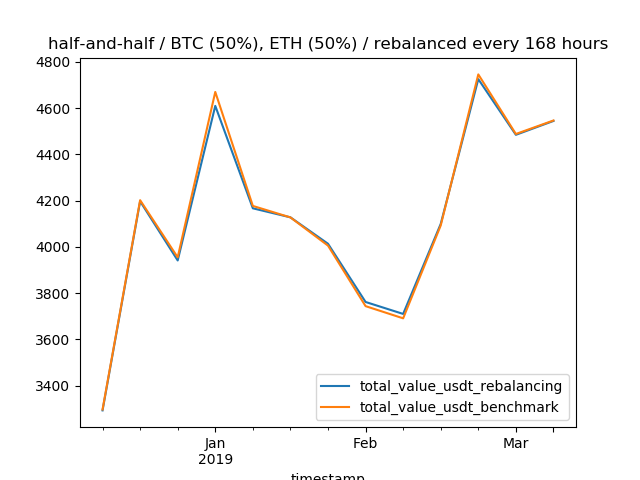

<IPython.core.display.Javascript object>


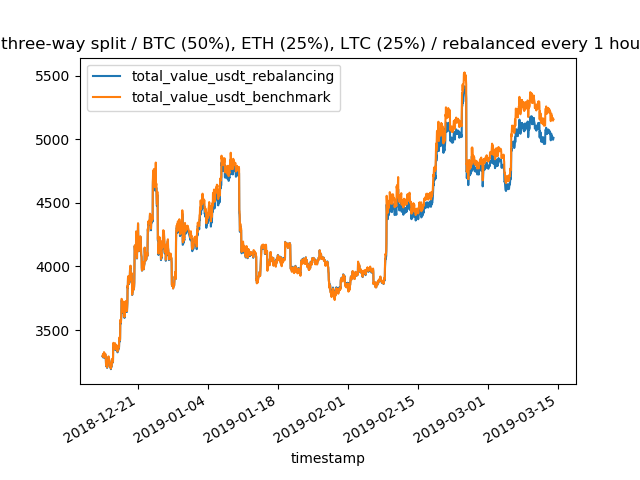

<IPython.core.display.Javascript object>


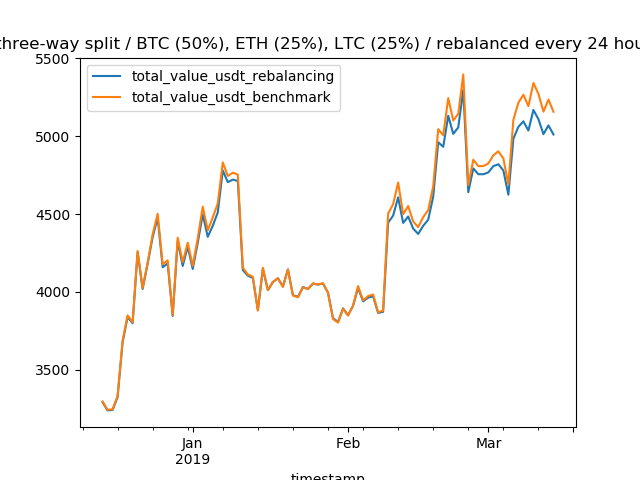

<IPython.core.display.Javascript object>


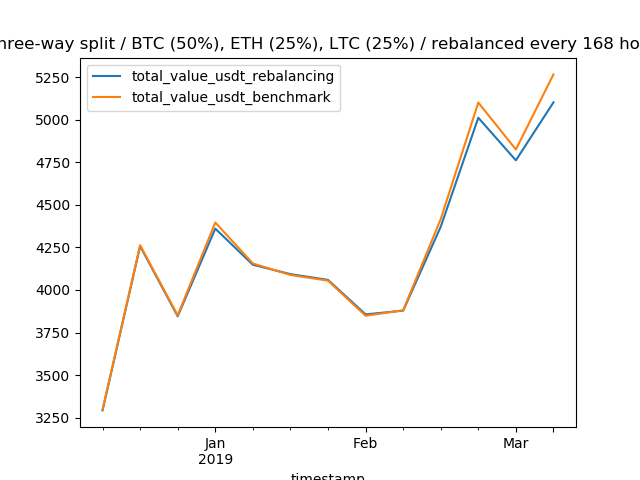

<IPython.core.display.Javascript object>


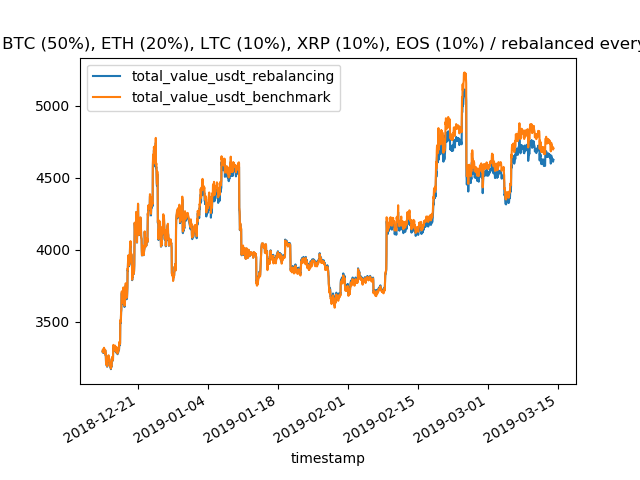

<IPython.core.display.Javascript object>


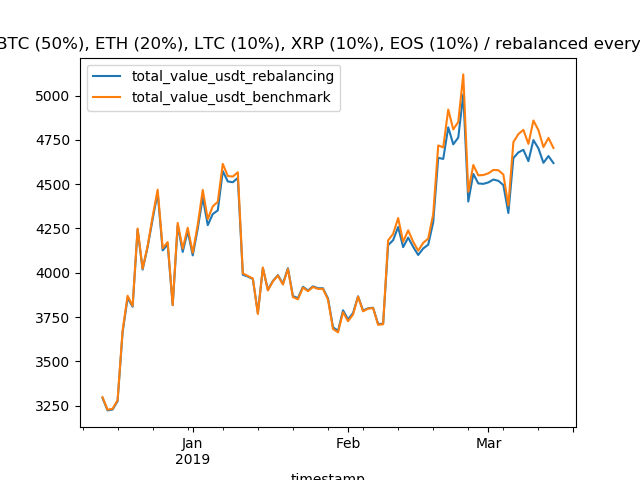

<IPython.core.display.Javascript object>


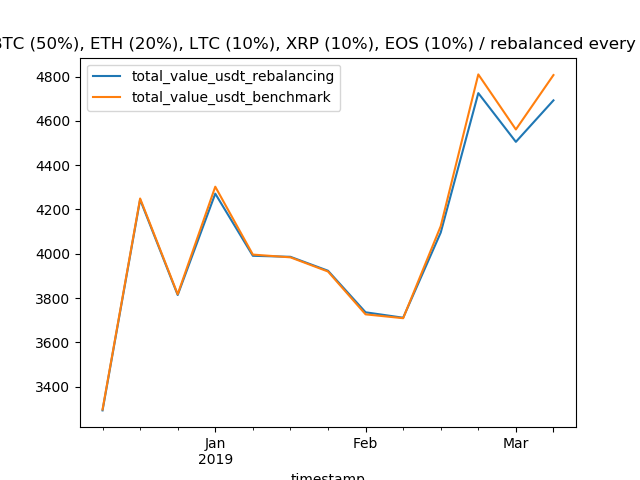

<IPython.core.display.Javascript object>


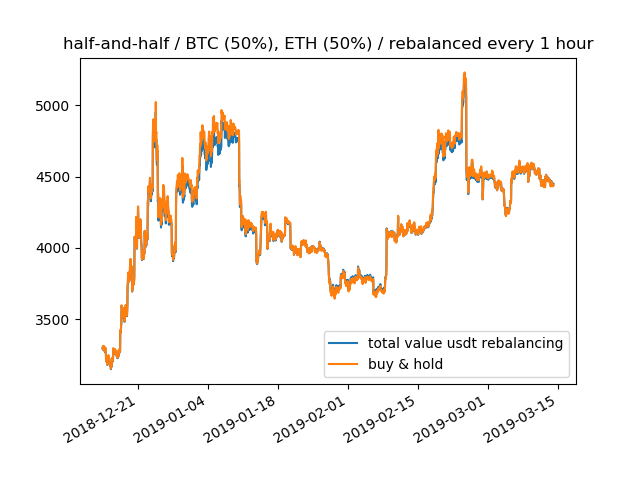

<IPython.core.display.Javascript object>


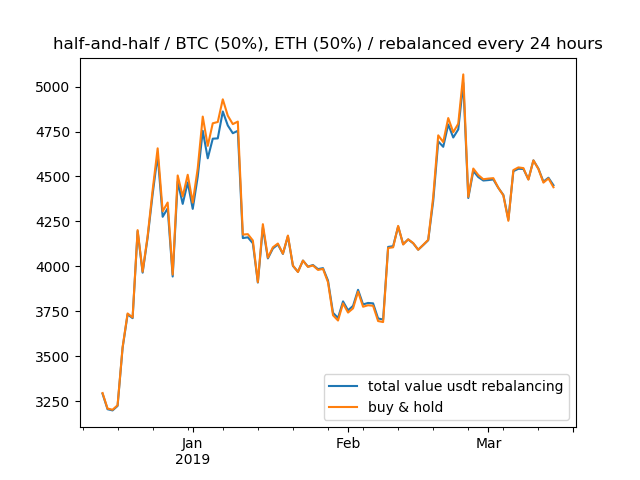

<IPython.core.display.Javascript object>


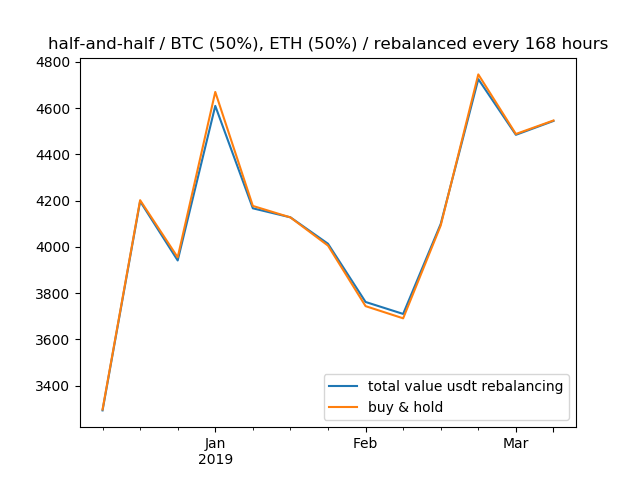

<IPython.core.display.Javascript object>


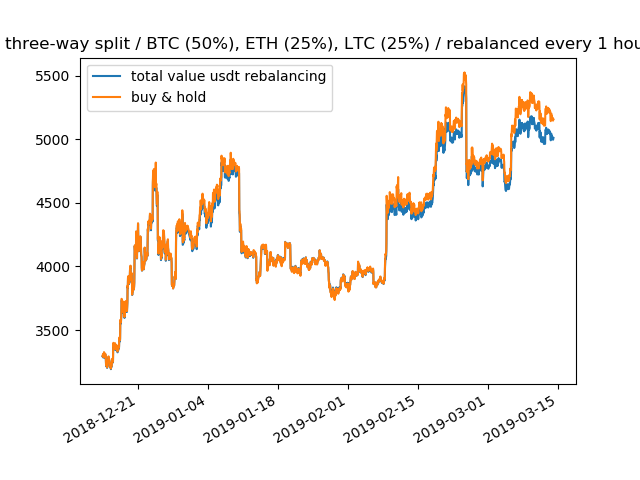

<IPython.core.display.Javascript object>


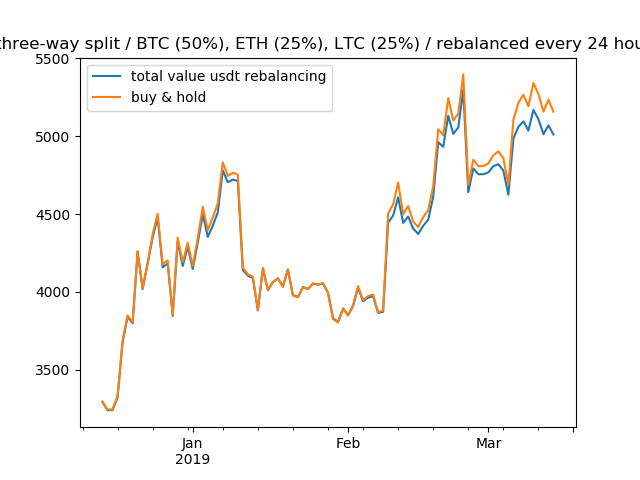

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


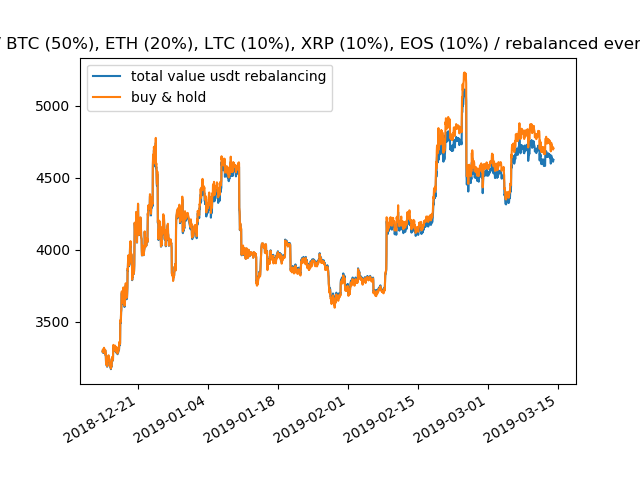

<IPython.core.display.Javascript object>


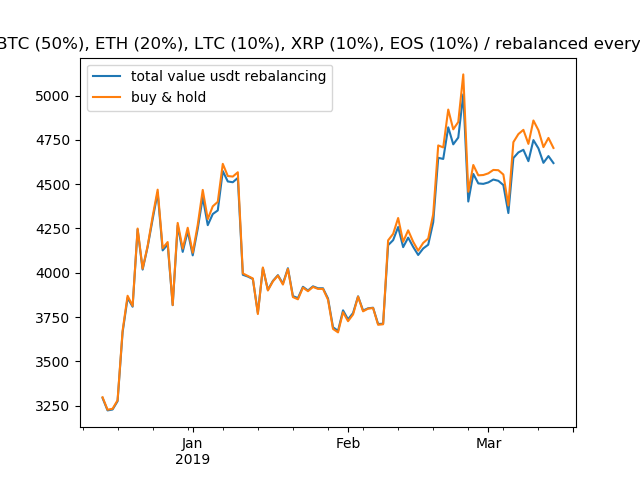

<IPython.core.display.Javascript object>


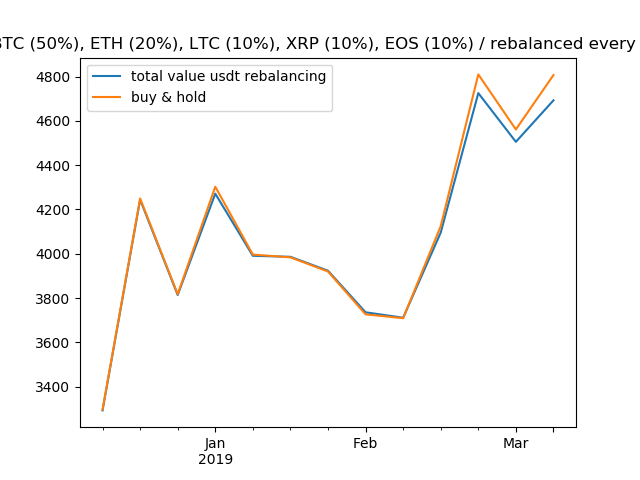

<IPython.core.display.Javascript object>


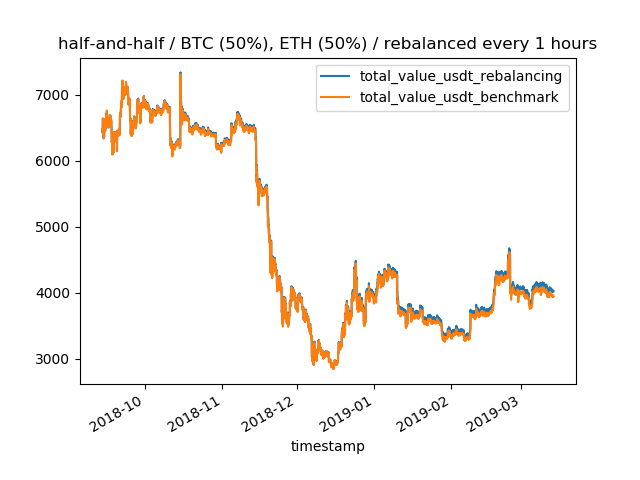

<IPython.core.display.Javascript object>


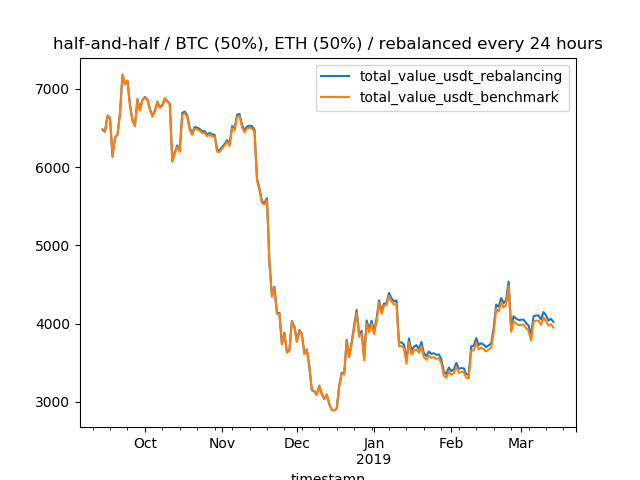

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


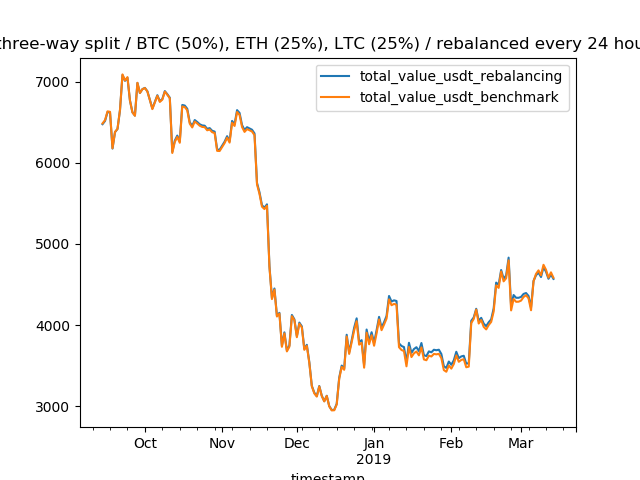

<IPython.core.display.Javascript object>


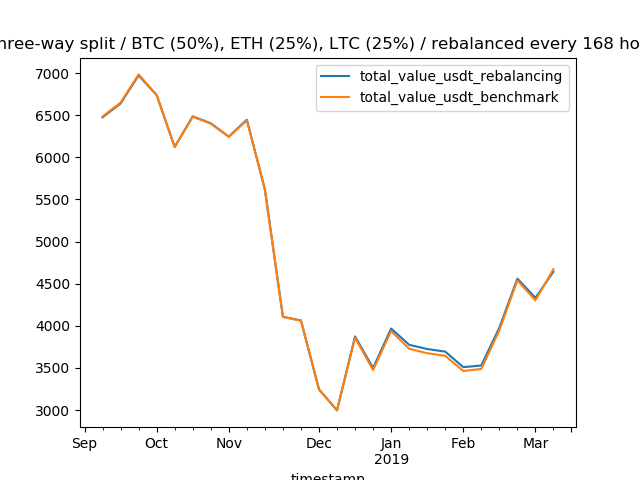

<IPython.core.display.Javascript object>


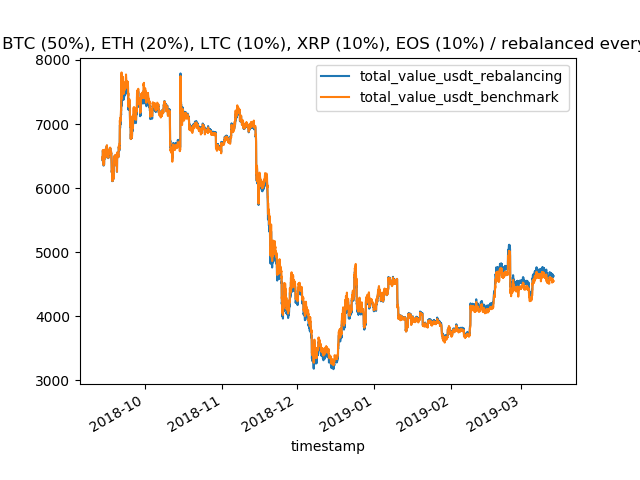

<IPython.core.display.Javascript object>


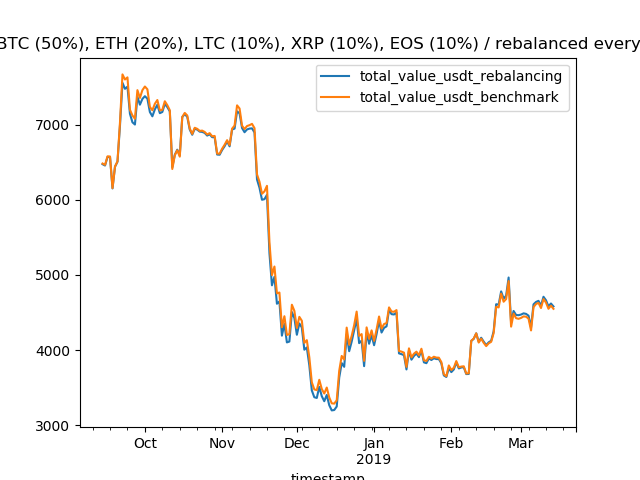

<IPython.core.display.Javascript object>


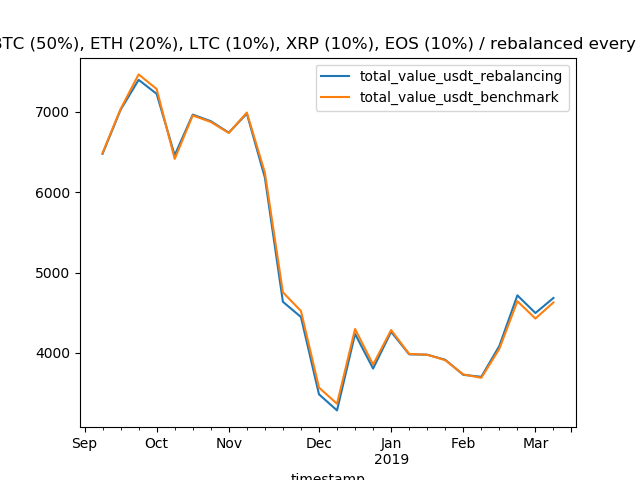

<IPython.core.display.Javascript object>


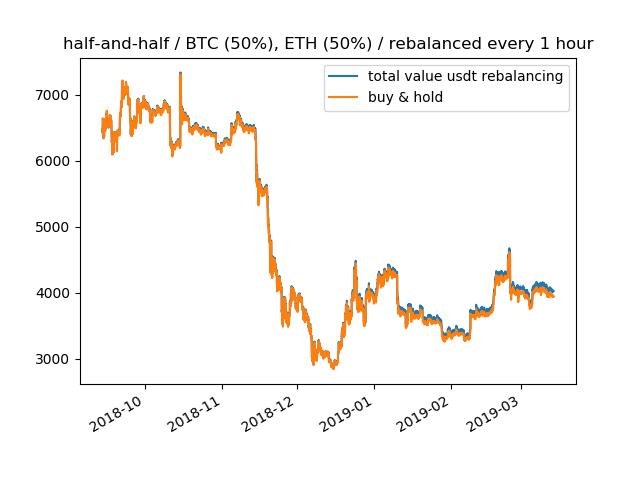

<IPython.core.display.Javascript object>


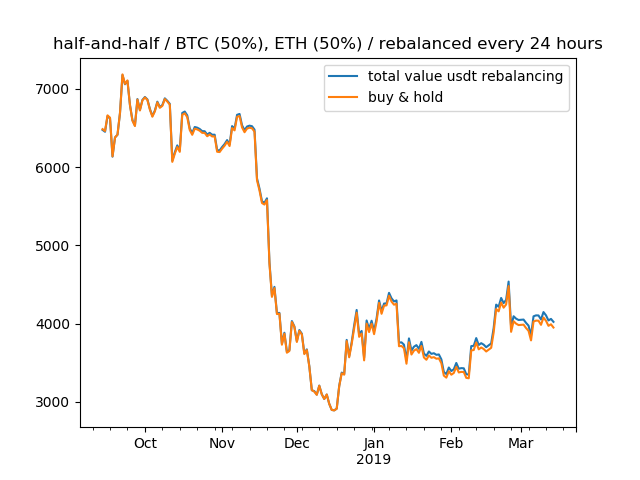

<IPython.core.display.Javascript object>


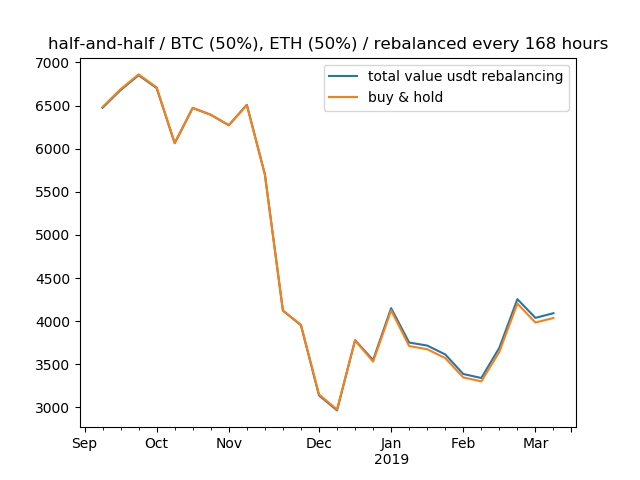

<IPython.core.display.Javascript object>


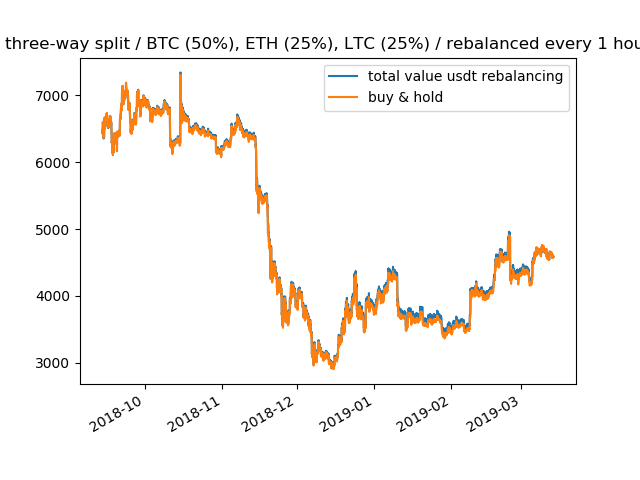

<IPython.core.display.Javascript object>


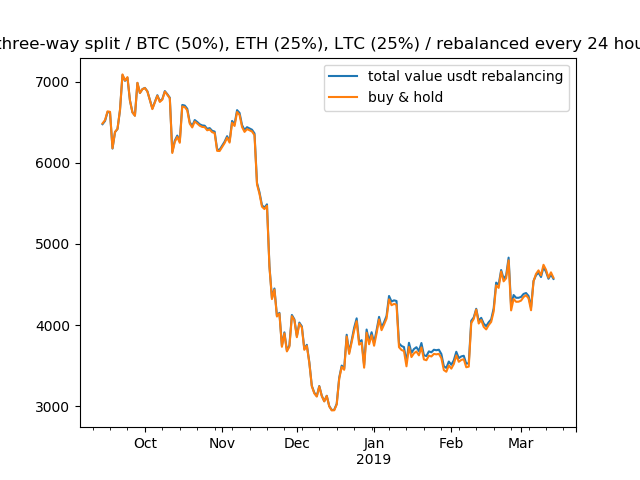

<IPython.core.display.Javascript object>


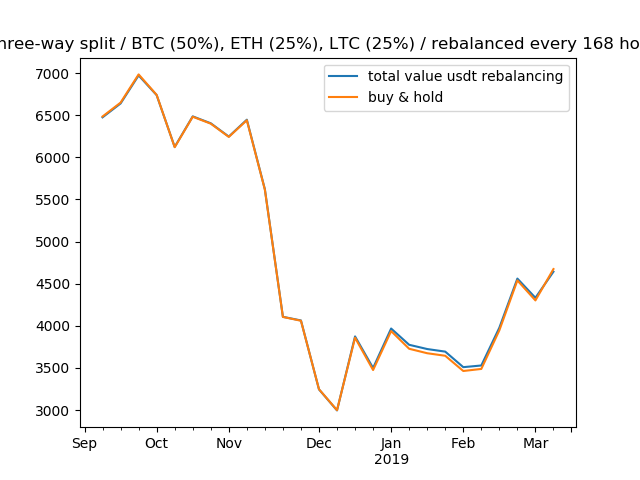

<IPython.core.display.Javascript object>


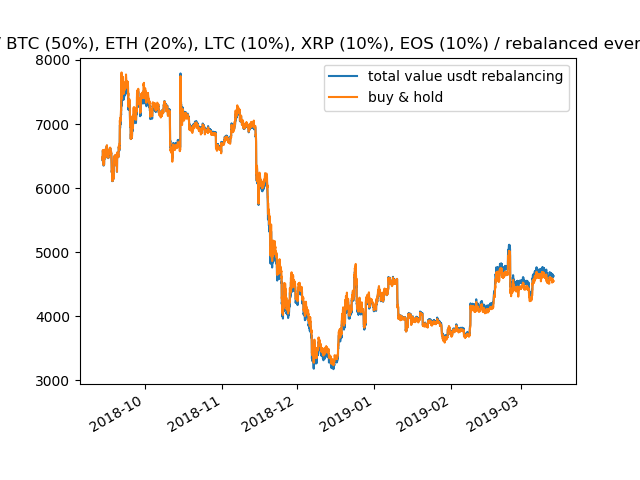

<IPython.core.display.Javascript object>


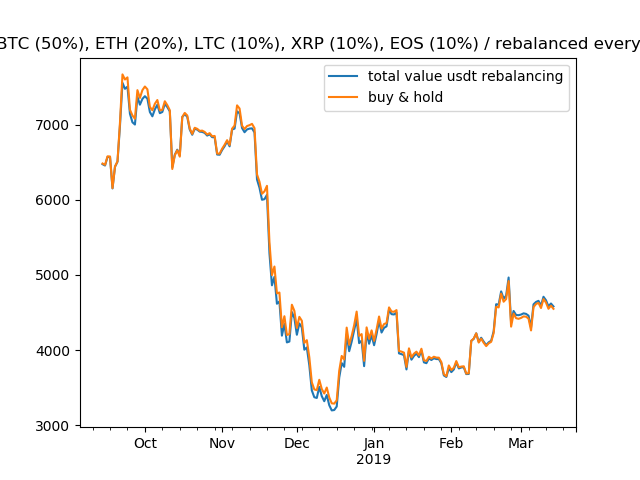

<IPython.core.display.Javascript object>


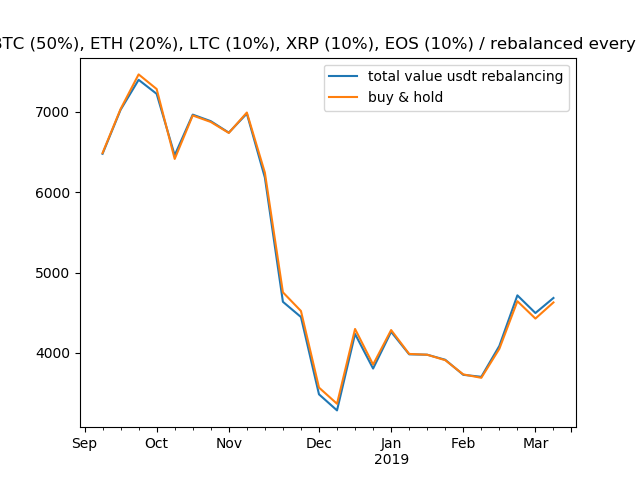

In [3]:
periods = {
    '1m': ('2019/02/14 00:00:00 UTC', '2019/03/14 00:00:00 UTC'),
    '3m': ('2018/12/14 00:00:00 UTC', '2019/03/14 00:00:00 UTC'),
    '6m': ('2018/09/14 00:00:00 UTC', '2019/03/14 00:00:00 UTC'),
}
cumulative_results = []
for name, period in periods.items():
    start_time = period[0]
    end_time = period[1]
    c = test_packs(start_time, end_time)
    c.plot_all_returns()
    cumulative_results.append(c)
    c.save_return_figs(f'past_{name}')
    
    save_info(c, f'backtesting_packs_blog_{name}.xlsx')
    
    